# **Air Quality prediction**





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
import numpy as np

**Dataset**

In [ ]:
df= pd.read_csv("/content/city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# **EDA**

In [ ]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.fillna(df.mean(), inplace=True)

<ipython-input-25-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [ ]:
df.drop("AQI_Bucket",axis=1)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.00000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,59.414476,71.500953,21.35922,22.941051,29.317936,20.711370,6.715753,16.909088,20.163443,14.226364,17.034769,3.932426,129.064348
min,0.040000,0.010000,0.02000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,32.150000,79.315000,6.21000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000
50%,58.030000,118.127103,11.53000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,1.840000,6.930000,3.070128,138.000000
75%,72.450000,118.127103,17.57473,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,3.280840,8.700972,3.070128,179.000000
max,949.990000,1000.000000,390.68000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


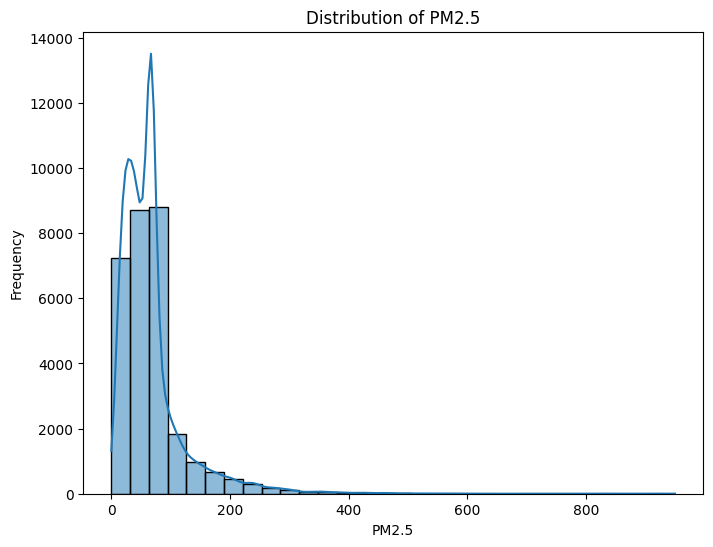

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['PM2.5'], bins=30, kde=True)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()

# **Correlation Heatmap**

<ipython-input-30-c799a56d0762>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


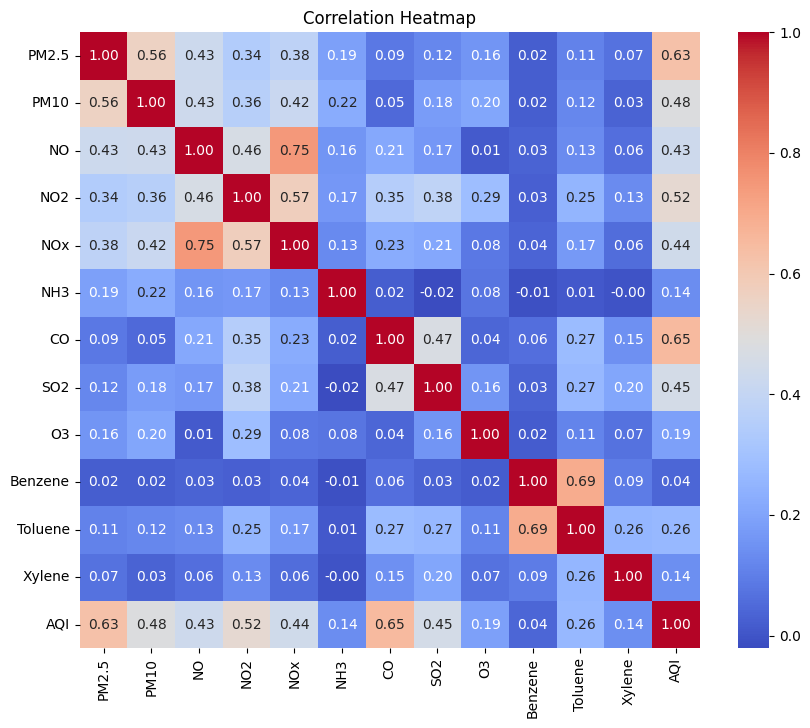

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

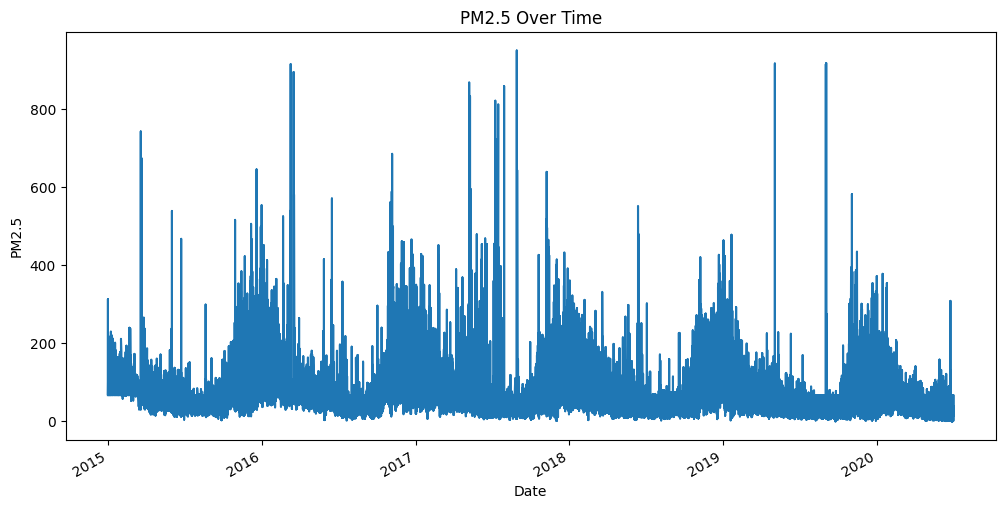

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
df['PM2.5'].plot()
plt.title('PM2.5 Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.show()

# **Modal**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
  df[i]=encoder.fit_transform(df[i])

# **Linear Regression**



In [ ]:
x=df.drop("PM2.5",axis=1)
y=df["PM2.5"]
scaler= StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred_lr)
r2=r2_score(y_test,y_pred_lr)
mae=mean_absolute_error(y_test,y_pred_lr)
print("mse:",mse)
print("r2:",r2)
print("mae:",mae)

mse: 2084362.741041063
r2: 0.735177840037049
mae: 1060.9571615775262


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
y_pred_dt=decision_tree.predict(x_test)
MSE=mean_squared_error(y_test,y_pred_dt)
r2_=r2_score(y_test,y_pred_dt)
MAE=mean_absolute_error(y_test,y_pred_dt)


print("mse:",MSE)
print("r2_score:",r2_)
print("mae:",MAE)

mse: 2029092.460470628
r2_score: 0.7422000319013645
mae: 867.080751650584


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred_rf=random_forest.predict(x_test)
mean_sq_error=mean_squared_error(y_test,y_pred_rf)
r2score=r2_score(y_test,y_pred_rf)
mean_abs_error=mean_absolute_error(y_test,y_pred_rf)

print("mse:",mean_sq_error)
print("r2:",r2score)
print("mae:",mean_abs_error)

mse: 973354.3261562891
r2: 0.8763335239176044
mae: 623.9287760284408


# **xgboost**

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

y_pred_xg=xgb.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xg)
r2_xgb=r2_score(y_test,y_pred_xg)
mae_xgb=mean_absolute_error(y_test,y_pred_xg)
print("mse:",mse_xgb)
print("r2:",r2_xgb)
print("mae:",mae_xgb)

mse: 948484.253386667
r2: 0.8794933128831266
mae: 624.4379567354893


# **catboost**

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=1000,
                                   learning_rate=0.1,
                                   depth=6,
                                   verbose=100)

catboost_model.fit(x_train, y_train)

y_pred_cb = catboost_model.predict(x_test)

mse_cb = mean_squared_error(y_test,y_pred_cb )
r2_cb=r2_score(y_test,y_pred_cb)
mae_cb=mean_absolute_error(y_test,y_pred_cb)
print("mse:",mse_cb)
print("r2:",r2_cb)
print("mae:",mae_cb)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00
0:	learn: 2622.3595065	total: 58.6ms	remaining: 58.5s
100:	learn: 1042.2072013	total: 1.61s	remaining: 14.4s
200:	learn: 946.7772021	total: 2.65s	remaining: 10.5s
300:	learn: 889.2828974	total: 3.69s	remaining: 8.57s
400:	learn: 844.6496242	total: 5.1s	remaining: 7.62s
500:	learn: 809.9415970	total: 6.2s	remaining: 6.17s
600:	learn: 782.4579315	total: 7.22s	remaining: 4.79s
700:	learn: 756.7357177	total: 7.95s	remaining: 3.39s
800:	learn: 734.1190291	total: 8.58s	remaining: 2.13s
900:	learn: 714.8330089	total: 10.3s	remaining: 1.14s
999:	learn: 695.4136773	total: 12.4s	remaining: 0us
mse: 884248.1405410673
r2: 0.8876546304006807
mae: 603.0967506133373


# **SVR**

In [ ]:
from sklearn.svm import SVR
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

svr = SVR(kernel='linear', C=100)

svr.fit(x_train, y_train)

y_pred_svr = svr.predict(x_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr=r2_score(y_test,y_pred_svr)
mae_svr=mean_absolute_error(y_test,y_pred_svr)
print("mse:",mse_svr)
print("r2:",r2_svr)
print("mae:",mae_svr)

mse: 2172756.4133162214
r2: 0.7239472596980083
mae: 1040.3701496920853


In [ ]:
scores=['MSE','MAE','R2 SCORE']
name=['linear regression','decision tree','random forest','xg_boost','cat_boost',"svm"]
pred=[y_pred_lr,y_pred_dt,y_pred_rf,y_pred_xg,y_pred_cb,y_pred_svr]
mse=[]
mae=[]
r2=[]
for j in pred:
  mse.append(mean_squared_error(y_test,j))
  mae.append(mean_absolute_error(y_test,j))
  r2.append(r2_score(y_test,j))
eval_scores=pd.DataFrame(
    {'Models':name,
     'MSE':mse,
     'MAE':mae,
     'R2':r2}
)
eval_scores

,Models,MSE,MAE,R2
0,linear regression,2.084363e+06,1060.957162,0.735178
1,decision tree,2.029092e+06,867.080752,0.742200
2,random forest,9.733543e+05,623.928776,0.876334
3,xg_boost,9.484843e+05,624.437957,0.879493
4,cat_boost,8.842481e+05,603.096751,0.887655
5,svm,2.172756e+06,1040.370150,0.723947
